# Assignment11
# This script is about image denoising.
# Name : Lee Gyu Hyeong
# Student ID : 20122208
# Link to github : https://github.com/GyuHyeong/assignment11.git

# Import packages for plotting graphs and manipulating data. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import signal
from skimage import io, color
from skimage import exposure

# Bring images and set properly for manipulating.

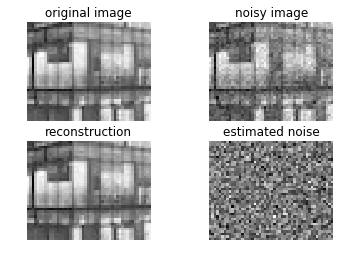

In [2]:
file_image  = 'cau.jpg'

im_color    = io.imread(file_image)
im_gray     = color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
im=im[100:140,100:150]
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = im # this must be replaced with the reconstructed (denoised) image 
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(im_recon, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

# Define a function that reconstruct the image. And this function has parameters noise std(noise standard deviation) and lamb(regularization parameter).

In [5]:
def denoising_func(noisestd,lamb):
    noise       = np.random.normal(0, noisestd, (row, col))
    imnoise    = im + noise

    # obtain the reconstructed (denoised) images with varying degrees of regularization 

    #im_recon    = im # this must be replaced with the reconstructed (denoised) image 
    #noise_recon = imnoise - im_recon
    #error       = np.linalg.norm(im - im_recon)
    
    A=np.zeros((3*row *col-row-col, row*col), dtype=float)
    for i in range(row*col):
        A[i,i]=1
    
    A_1=np.zeros((row*col-row,row*col),dtype=float)
    A_2=np.zeros((row*col-col,row*col),dtype=float)
    nn=0
    for i in range(row*col-row):
        A_1[i,i+nn]=1
        A_1[i,i+1+nn]=-1
        if((i+1)%(col-1)==0):
            nn+=1
    for i in range(row*col-col):
        A_2[i,i]=1
        A_2[i,i+col]=-1
    A_1=A_1*math.sqrt(lamb)
    A_2=A_2*math.sqrt(lamb)
    for i in range(row*col-row):
        for j in range(row*col):
            A[i+row*col,j]=A_1[i,j]
    for i in range(row*col-col):
        for j in range(row*col):
            A[i+2*row*col-row,j]=A_2[i,j]
    
    f=np.zeros(3*row*col-row-col, dtype=float)
    f_0=imnoise.reshape(row*col)
    for i in range(row*col):
        f[i]=f_0[i]
    
    imrecon=((np.linalg.pinv((A.T).dot(A))).dot(A.T)).dot(f)
    imrecon=imrecon.reshape((row,col))
    error       = np.linalg.norm(im - imrecon)
    
    print('     when lambda: ',lamb)
    plt.title('reconstruction')
    plt.imshow(imrecon, cmap='gray')
    plt.axis('off')
    plt.show()
    
    print('     error: ',error)
    print('\n')
    
    return 
    
    

# Try with varying the noise standard deviation  and the regularization parameter.

when noise std:  0.2


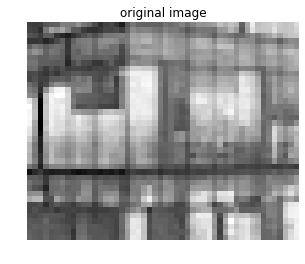

     when lambda:  0.03125


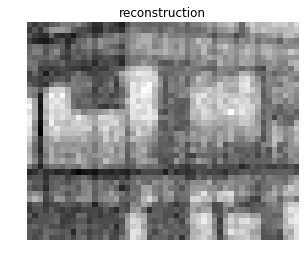

     error:  8.194404466256422


     when lambda:  0.0625


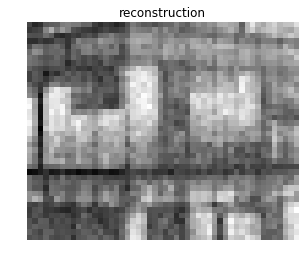

     error:  7.4262087599724405


     when lambda:  0.125


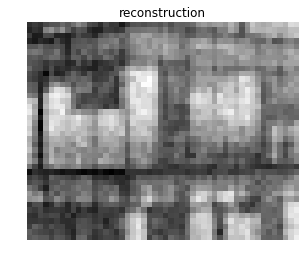

     error:  7.36855722325822


     when lambda:  0.25


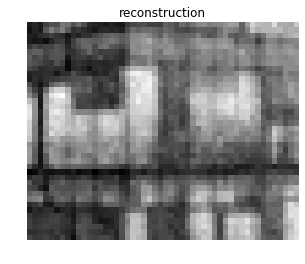

     error:  7.655615372586604


     when lambda:  0.5


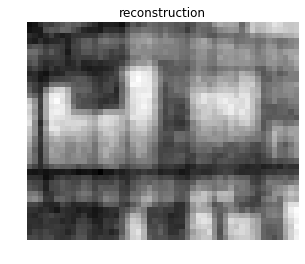

     error:  9.293020184926867


     when lambda:  1


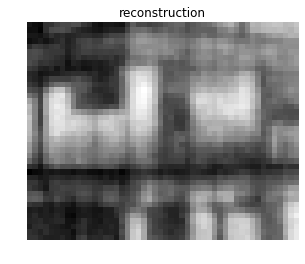

     error:  11.866670597616475


     when lambda:  2


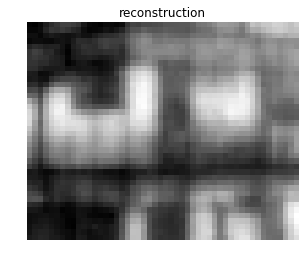

     error:  14.742453063020818


     when lambda:  4


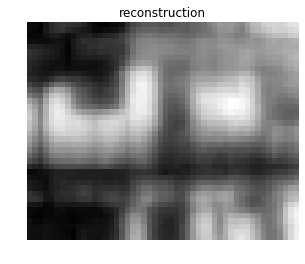

     error:  17.654645789816396


     when lambda:  8


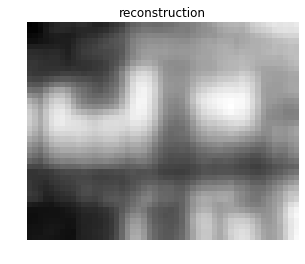

     error:  20.2648665196544


     when lambda:  16


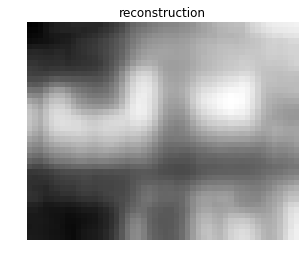

     error:  22.54765137101933


--------------------------------------
when noise std:  0.45


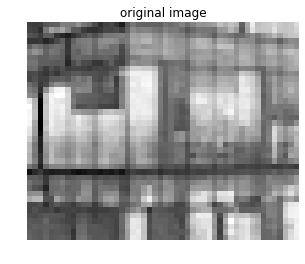

     when lambda:  0.03125


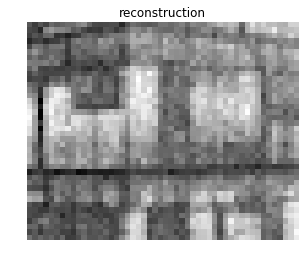

     error:  8.158127822270712


     when lambda:  0.0625


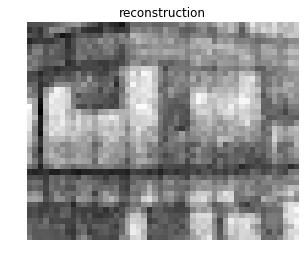

     error:  7.537740100223528


     when lambda:  0.125


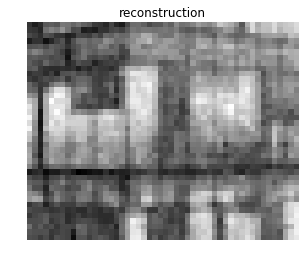

     error:  7.143774361447789


     when lambda:  0.25


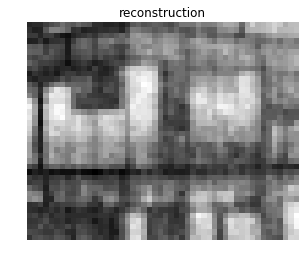

     error:  7.480609288193082


     when lambda:  0.5


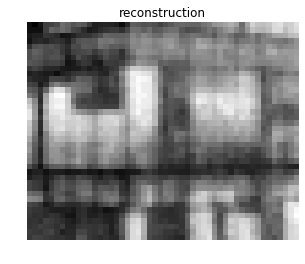

     error:  9.149702865751383


     when lambda:  1


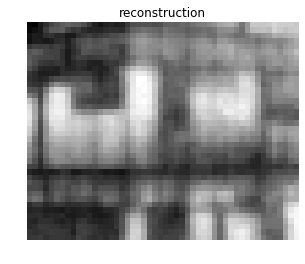

     error:  11.818489492392839


     when lambda:  2


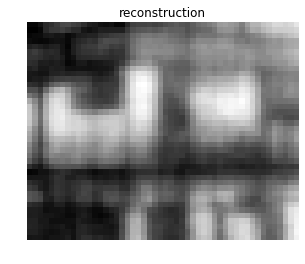

     error:  14.62412005393953


     when lambda:  4


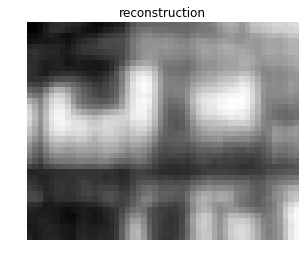

     error:  17.645384814348567


     when lambda:  8


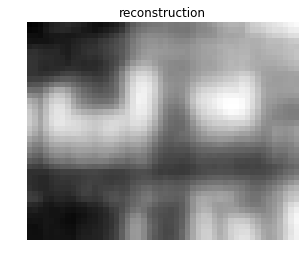

     error:  20.31931347702217


     when lambda:  16


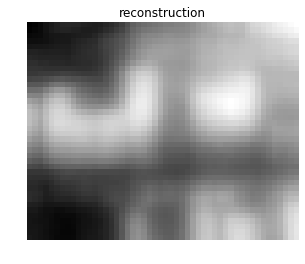

     error:  22.552686882723425


--------------------------------------
when noise std:  0.7


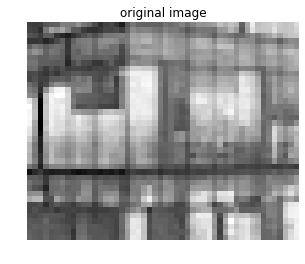

     when lambda:  0.03125


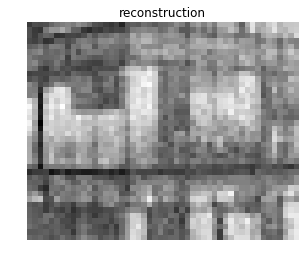

     error:  7.679537841528522


     when lambda:  0.0625


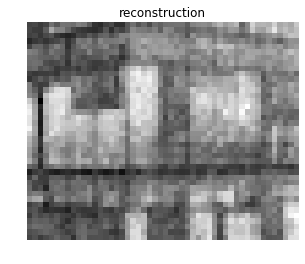

     error:  7.69329817762405


     when lambda:  0.125


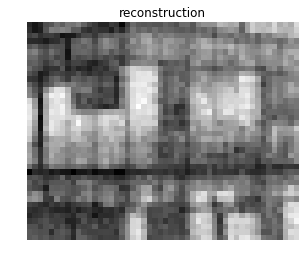

     error:  7.240857118195596


     when lambda:  0.25


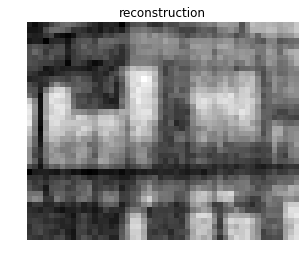

     error:  7.565808988747715


     when lambda:  0.5


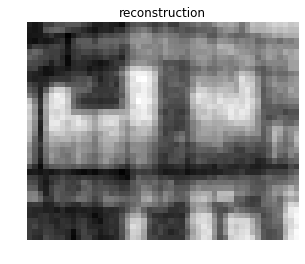

     error:  9.34876383333527


     when lambda:  1


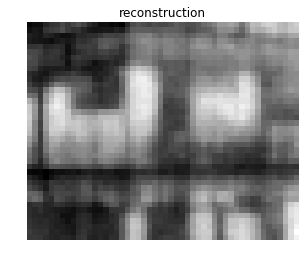

     error:  11.929299399810466


     when lambda:  2


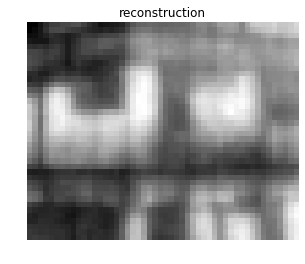

     error:  14.72735677397659


     when lambda:  4


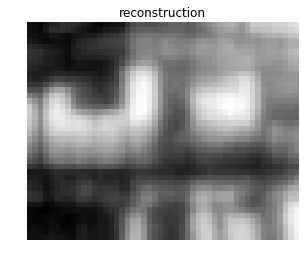

     error:  17.558064376893743


     when lambda:  8


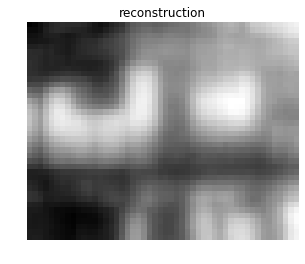

     error:  20.254752927545123


     when lambda:  16


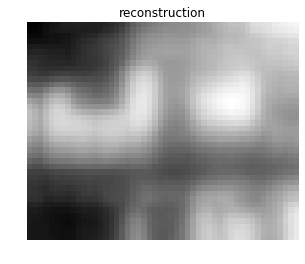

     error:  22.51698252980321


--------------------------------------
when noise std:  1


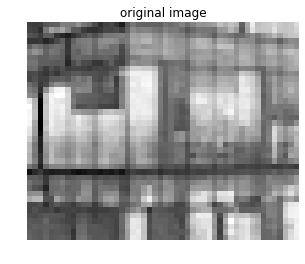

     when lambda:  0.03125


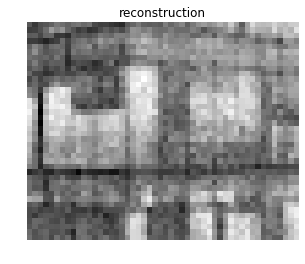

     error:  8.181411021857839


     when lambda:  0.0625


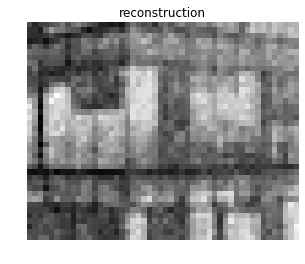

     error:  7.7392971610548225


     when lambda:  0.125


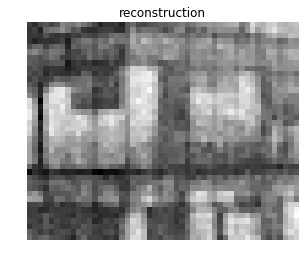

     error:  7.248857630219282


     when lambda:  0.25


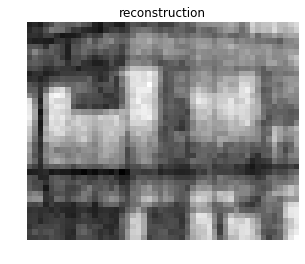

     error:  7.748122540318617


     when lambda:  0.5


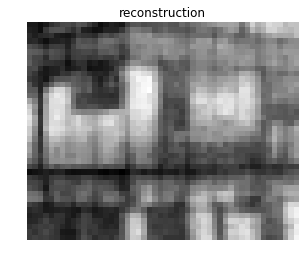

     error:  9.114730305795703


     when lambda:  1


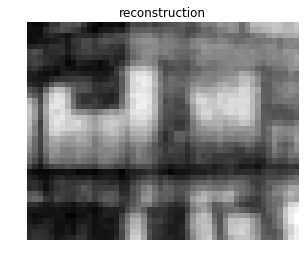

     error:  12.008389460317261


     when lambda:  2


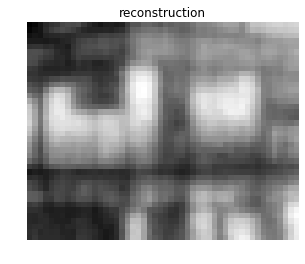

     error:  14.651970029247158


     when lambda:  4


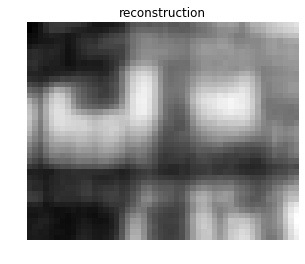

     error:  17.668946645535254


     when lambda:  8


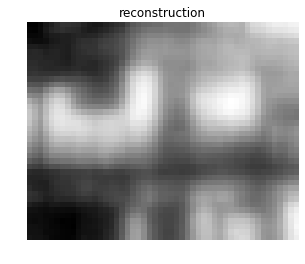

     error:  20.209214505403082


     when lambda:  16


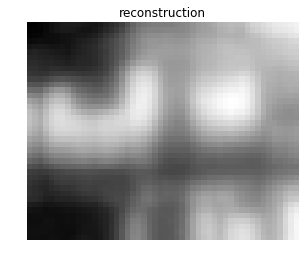

     error:  22.557980486134593


--------------------------------------
when noise std:  1.4


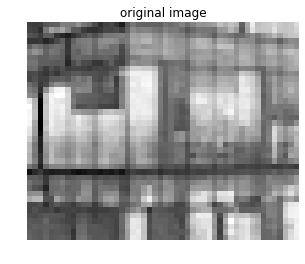

     when lambda:  0.03125


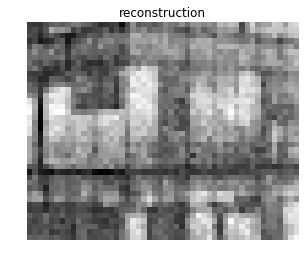

     error:  8.194649270795619


     when lambda:  0.0625


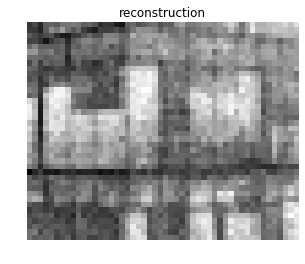

     error:  7.718643983875072


     when lambda:  0.125


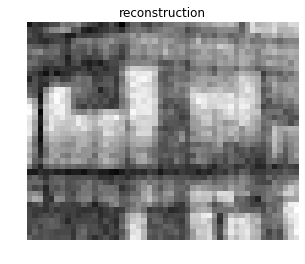

     error:  7.320036958382218


     when lambda:  0.25


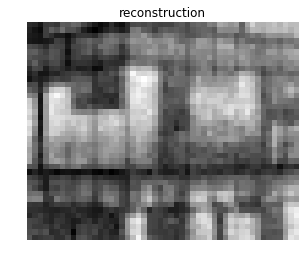

     error:  7.645047643444229


     when lambda:  0.5


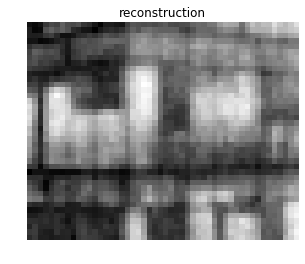

     error:  9.394242280196131


     when lambda:  1


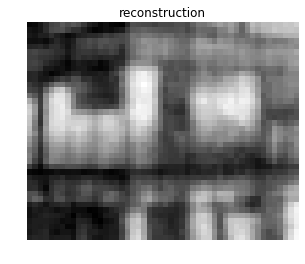

     error:  11.750006474180235


     when lambda:  2


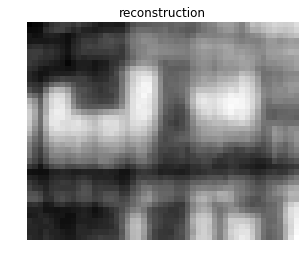

     error:  14.812803156738951


     when lambda:  4


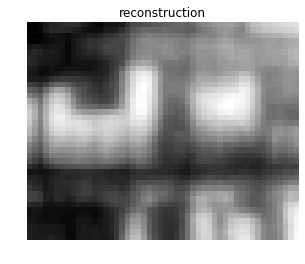

     error:  17.604164700107898


     when lambda:  8


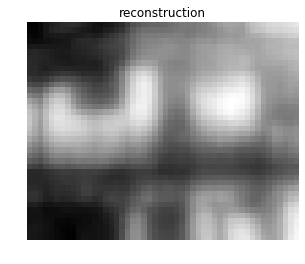

     error:  20.24563229568501


     when lambda:  16


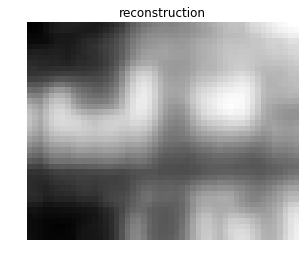

     error:  22.620771980484477


--------------------------------------


In [6]:
print('when noise std: ',0.2)
plt.title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()
for i in range(-5,5):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',0.45)
plt.title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()
for i in range(-5,5):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',0.7)
plt.title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()
for i in range(-5,5):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',1)
plt.title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()
for i in range(-5,5):
    denoising_func(0.2,2**(i))
print('--------------------------------------')

print('when noise std: ',1.4)
plt.title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()
for i in range(-5,5):
    denoising_func(0.2,2**(i))
print('--------------------------------------')